III. Text Similarity
1. Similarity metrics

In [25]:
import nltk
import numpy as np
import pandas as pd

In [26]:
A = "Outside the classroom, Stallman pursued his studies with even more diligence, rushing off to fulfill his laboratory-assistant duties at Rockefeller University during the week and dodging the Vietnam protesters on his way to Saturday school at Columbia. It was there, while the rest of the Science Honors Program students sat around discussing their college choices, that Stallman finally took a moment to participate in the preclass bull session."
B = "To facilitate the process, AI Lab hackers had built a system that displayed both the source and display modes on a split screen. Despite this innovative hack, switching from mode to mode was still a nuisance."
C = "With no dorm and no dancing, Stallman's social universe imploded. Like an astronaut experiencing the aftereffects of zero-gravity, Stallman found that his ability to interact with nonhackers, especially female nonhackers, had atrophied significantly. After 16 weeks in the AI Lab, the self confidence he'd been quietly accumulating during his 4 years at Harvard was virtually gone."

In [27]:
set_A = set(A.lower().split())
set_B = set(B.lower().split())
set_C = set(C.lower().split())

inter_AB = len(set_A.intersection(set_B))
union_AB = len(set_A.union(set_B))

inter_AC = len(set_A.intersection(set_C))
union_AC = len(set_A.union(set_C))

inter_BC = len(set_B.intersection(set_C))
union_BC = len(set_B.union(set_C))

jacc_AB = inter_AB / union_AB
jacc_AC = inter_AC / union_AC
jacc_BC = inter_BC / union_BC

print("Jaccard Similarity between A and B:", jacc_AB)
print("Jaccard Similarity between A and C:", jacc_AC)
print("Jaccard Similarity between B and C:", jacc_BC)



Jaccard Similarity between A and B: 0.08641975308641975
Jaccard Similarity between A and C: 0.12631578947368421
Jaccard Similarity between B and C: 0.0945945945945946


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform([A, B, C])

cosine_sim_AB = cosine_similarity(tfidf[0], tfidf[1])
cosine_sim_BC = cosine_similarity(tfidf[1], tfidf[2])
cosine_sim_AC = cosine_similarity(tfidf[0], tfidf[2])

print("cos(A, B):", cosine_sim_AB)
print("cos(B, C):", cosine_sim_BC)
print("cos(A, C):", cosine_sim_AC)

cos(A, B): [[0.1679327]]
cos(B, C): [[0.13618963]]
cos(A, C): [[0.2850296]]


2. TF-IDF

In [29]:
df = pd.read_csv("headlines.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [31]:
df.head()

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...


In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
df['tokens'] = df['headline_text'].apply(lambda x: word_tokenize(x))

df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

df['Stem'] = df['tokens'].apply(lambda tokens:' '.join(tokens))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ThisPc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['tokens']

0         [algorithm, make, decis, behalf, feder, minist]
1       [andrew, forrest, fmg, appeal, pilbara, nativ,...
2                                 [rural, mural, thallan]
3                  [australia, church, risk, becom, abus]
4       [australian, compani, usgfx, embroil, shanghai...
                              ...                        
1994    [constitut, avenu, win, top, prize, act, archi...
1995                         [dark, mofo, number, crunch]
1996    [david, petraeu, say, australia, must, firm, s...
1997    [driverless, car, australia, face, challeng, r...
1998               [drug, compani, criticis, price, hike]
Name: tokens, Length: 1999, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['tokens'])
bow = vectorizer.transform(df['tokens'])

print(bow.shape)

(1999, 4271)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['Stem'])

tfidf = vectorizer.transform(df['Stem'])

tfidf_array = tfidf.toarray()

all_zero = (tfidf_array == 0).all()

if not all_zero:
    print(tfidf_array[0])

[0.3943827  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.24444796 0.12987231 0.10011226 0.21470886 0.40884261 0.29023513
 0.12972179 0.23484967 0.34095845 0.         0.15309538 0.18376484
 0.32930567 0.08609939 0.08749485 0.         0.         0.16659404
 0.18357889 0.17297874 0.         0.         0.         0.
 0.         0.        ]


In [36]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['tokens'])

tfidf = vectorizer.transform(df['tokens'])

tfidf_array = tfidf.toarray()

average_tfidf = np.mean(tfidf_array, axis = 0)

highest_indices = np.argsort(-average_tfidf)[:10]
lowest_indices = np.argsort(average_tfidf)[:10]

feature_names = vectorizer.get_feature_names_out()

print("Word with the highest indices: ")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])

print("\nWords with the lowest indices: ")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])

Word with the highest indices: 
australia 0.009983014998891405
australian 0.00969733014866161
new 0.008703107457097207
polic 0.0077360592047481126
say 0.007540459757782178
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829903
sydney 0.0056424159732095394

Words with the lowest indices: 
nmfc 0.0001527054029533165
coll 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
adel 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
gw 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.0001613676677950104


In [37]:
documents = df['tokens'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(documents)

In [38]:
average_tfidf = np.mean(tfidf.toarray(), axis=0)

highest_indi = np.argsort(-average_tfidf)[:10]
lowest_indi = np.argsort(average_tfidf)[:10]

feature_names = vectorizer.get_feature_names_out()

print("Words with highest average: " )
for index in highest_indi:
    print(feature_names[index], average_tfidf[index])
    
print("Words with lowest average: " )
for index in lowest_indi:
    print(feature_names[index], average_tfidf[index])


Words with highest average: 
australia 0.009983014998891405
australian 0.009729510942149733
new 0.008703107457097207
polic 0.007736059204748111
say 0.007555848605072935
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829904
sydney 0.005659788840016151
Words with lowest average: 
adel 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
coll 0.0001527054029533165
gw 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
nmfc 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.00016136766779501044


In [39]:
documents = df['tokens'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(documents)

In [40]:
average_tfidf = np.mean(tfidf.toarray(), axis=0)

highest_indices = np.argsort(-average_tfidf)[:10]
lowest_indices = np.argsort(average_tfidf)[:10]

feature_names = vectorizer.get_feature_names_out()

print("Word with highest indices: ")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])
    
print("Word with lowest indices: ")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])

Word with highest indices: 
australia 0.009983014998891405
australian 0.009729510942149733
new 0.008703107457097207
polic 0.007736059204748111
say 0.007555848605072935
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829904
sydney 0.005659788840016151
Word with lowest indices: 
adel 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
coll 0.0001527054029533165
gw 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
nmfc 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.00016136766779501044


3. Plagiarism checker

In [41]:
file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [42]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [43]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvect = TfidfVectorizer()
tfvect.fit(alldata)


tfidf = tfvect.fit_transform(alldata).toarray()
TFA = tfvect.transform([A0, A1]).toarray()
TFB = tfvect.transform([B0, B1]).toarray()
TFC = tfvect.transform([C0, C1]).toarray()
TFD = tfvect.transform([D0, D1, D2]).toarray()

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarityAA = cosine_similarity(TFA, TFA)

similarityBB = cosine_similarity(TFB, TFB)

similarityCC = cosine_similarity(TFC, TFC)

similarityDD = cosine_similarity(TFD, TFD)

similarityAll = cosine_similarity(tfidf, tfidf)

In [46]:
print(similarityAA)
print(similarityBB)
print(similarityCC)
print(similarityDD)

[[1.         0.81898863]
 [0.81898863 1.        ]]
[[1.         0.63747903]
 [0.63747903 1.        ]]
[[1.         0.85723864]
 [0.85723864 1.        ]]
[[1.         0.91153882 0.45775827]
 [0.91153882 1.         0.46409641]
 [0.45775827 0.46409641 1.        ]]


In [47]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.21594796, 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.18046478, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07994656, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.12146166, 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16298738, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.18176114, 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.91153882, 0.45775827],
       [0.21594796, 0.18046478, 0.07994656, 0.12146166, 0.16298738,
        0.18176114, 0.91153882, 1.        , 0.46409641],


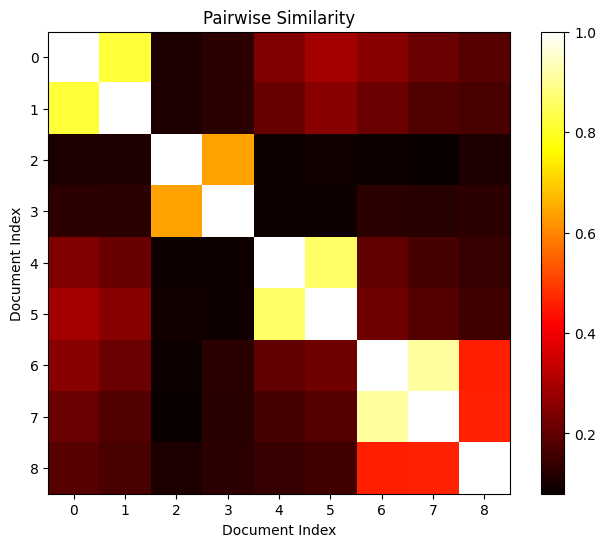

In [53]:
import matplotlib.pyplot as plt
pred_plagiarism = similarityAll>0.2
# Function to plot the pairwise similarity matrix
def plot_similarity(similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Pairwise Similarity')
    plt.xlabel('Document Index')
    plt.ylabel('Document Index')
    plt.show()



plot_similarity(similarityAll)

In [54]:
import numpy as np

real_plagiarism = np.zeros((9, 9))

real_plagiarism[0:2, 0:2] = 1  
real_plagiarism[2:4, 2:4] = 1 
real_plagiarism[4:6, 4:6] = 1 
real_plagiarism[6:9, 6:9] = 1  


print(real_plagiarism)

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]]


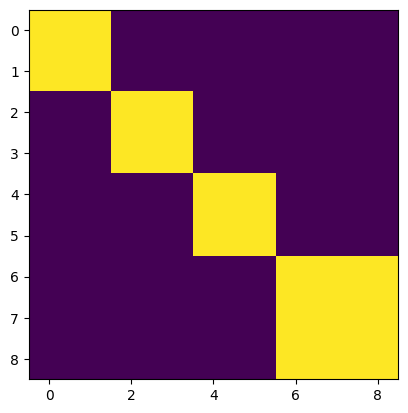

In [55]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

threshold = 0.5
binary_predictions_All = (similarityAll > threshold).astype(int).flatten()

true_labels = real_plagiarism.flatten()

accuracy_All = accuracy_score(true_labels, binary_predictions_All)

print("Accuracy for All Documents:", accuracy_All)

Accuracy for All Documents: 0.9506172839506173
